In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import erfinv
import math

from sklearn.metrics import mean_absolute_error as mae

In [2]:
data_ref = sio.loadmat("data/data_weekly_avg.mat")

In [3]:
# all means, for 1 q
def cal_quantile_forecasts(mean_list, std, q): 
    res = []
    for mean in mean_list:
        val = mean + std * math.sqrt(2) * erfinv(2 * q - 1)
        res = res + [val]
    return res

In [4]:
res = sio.loadmat("result/res_V14_1.mat")

all_cases_pred = res['all_cases_pred']
all_deaths_pred = res['all_deaths_pred']
all_hospitalized_pred = res['all_hospitalized_pred']

cases_pred = [[0] for i in range(4)]
deaths_pred = [[0] for i in range(4)]
hospitalized_pred = [[0] for i in range(4)]

cases_pred[0] = np.log(all_cases_pred[0][40:-4] *120000)
deaths_pred[0] = np.log(all_deaths_pred[0][40:-4] * 500)
hospitalized_pred[0] = np.log(all_hospitalized_pred[0][40:-4] * 2000)

cases_pred[1] = np.log(all_cases_pred[1][40:-4] *120000)
deaths_pred[1] = np.log(all_deaths_pred[1][40:-4] * 500)
hospitalized_pred[1] = np.log(all_hospitalized_pred[1][40:-4] * 2000)

cases_pred[2] = np.log(all_cases_pred[2][40:-4] *120000)
deaths_pred[2] = np.log(all_deaths_pred[2][40:-4] * 500)
hospitalized_pred[2] = np.log(all_hospitalized_pred[2][40:-4] * 2000)

cases_pred[3] = np.log(all_cases_pred[3][40:-4] *120000)
deaths_pred[3] = np.log(all_deaths_pred[3][40:-4] * 500)
hospitalized_pred[3] = np.log(all_hospitalized_pred[3][40:-4] * 2000)

In [5]:
e_cases = [[0] for i in range(4)]
e_deaths = [[0] for i in range(4)]
e_hospitalized = [[0] for i in range(4)]

e_cases[0] = (cases_pred[0].reshape(-1,1) - np.log(data_ref["cases"].T[40:110]))
e_deaths[0] = (deaths_pred[0].reshape(-1,1) - np.log(data_ref["deaths"].T[40:110]))
e_hospitalized[0] = (hospitalized_pred[0].reshape(-1,1) - np.log(data_ref["hospitalized"].T[40:110]))

e_cases[1] = (cases_pred[1].reshape(-1,1) - np.log(data_ref["cases"].T[40:110]))
e_deaths[1] = (deaths_pred[1].reshape(-1,1) - np.log(data_ref["deaths"].T[40:110]))
e_hospitalized[1] = (hospitalized_pred[1].reshape(-1,1) - np.log(data_ref["hospitalized"].T[40:110]))

e_cases[2] = (cases_pred[2].reshape(-1,1) - np.log(data_ref["cases"].T[40:110]))
e_deaths[2] = (deaths_pred[2].reshape(-1,1) - np.log(data_ref["deaths"].T[40:110]))
e_hospitalized[2] = (hospitalized_pred[2].reshape(-1,1) - np.log(data_ref["hospitalized"].T[40:110]))

e_cases[3] = (cases_pred[3].reshape(-1,1) - np.log(data_ref["cases"].T[40:110]))
e_deaths[3] = (deaths_pred[3].reshape(-1,1) - np.log(data_ref["deaths"].T[40:110]))
e_hospitalized[3] = (hospitalized_pred[3].reshape(-1,1) - np.log(data_ref["hospitalized"].T[40:110]))

In [6]:
q = 0.975

cases_quantile_975 = [[0] for i in range(4)]
deaths_quantile_975 = [[0] for i in range(4)]
hospitalized_quantile_975 = [[0] for i in range(4)]

for i in range(4):
    cases_quantile_975[i] = cal_quantile_forecasts(cases_pred[i], np.std(e_cases[i]), q)
    deaths_quantile_975[i] = cal_quantile_forecasts(deaths_pred[i], np.std(e_deaths[i]), q)
    hospitalized_quantile_975[i] = cal_quantile_forecasts(hospitalized_pred[i], np.std(e_hospitalized[i]), q)

In [7]:
q = 0.5

cases_quantile_5 = [[0] for i in range(4)]
deaths_quantile_5 = [[0] for i in range(4)]
hospitalized_quantile_5 = [[0] for i in range(4)]

for i in range(4):
    cases_quantile_5[i] = cal_quantile_forecasts(cases_pred[i], np.std(e_cases[i]), q)
    deaths_quantile_5[i] = cal_quantile_forecasts(deaths_pred[i], np.std(e_deaths[i]), q)
    hospitalized_quantile_5[i] = cal_quantile_forecasts(hospitalized_pred[i], np.std(e_hospitalized[i]), q)

In [8]:
q = 0.025

cases_quantile_025 = [[0] for i in range(4)]
deaths_quantile_025 = [[0] for i in range(4)]
hospitalized_quantile_025 = [[0] for i in range(4)]

for i in range(4):
    cases_quantile_025[i] = cal_quantile_forecasts(cases_pred[i], np.std(e_cases[i]), q)
    deaths_quantile_025[i] = cal_quantile_forecasts(deaths_pred[i], np.std(e_deaths[i]), q)
    hospitalized_quantile_025[i] = cal_quantile_forecasts(hospitalized_pred[i], np.std(e_hospitalized[i]), q)

In [9]:
def mergeTwoArray(x1, x2, y1, y2, z1, z2):
    # create a merged and sorted x array
    x = np.concatenate((x1, x2))
    ids = x.argsort(kind='mergesort')
    x = x[ids]

    # find unique values
    flag = np.ones_like(x, dtype=bool)
    np.not_equal(x[1:], x[:-1], out=flag[1:])

    # discard duplicated values
    x = x[flag]

    # merge, sort and select values for y
    y = np.concatenate((y1, y2))[ids][flag]
    z = np.concatenate((z1, z2))[ids][flag]
    
    return x, y, z

In [10]:
def calConcatQuantileForecasts(week_start, week_end, 
                               cases_quantile_975, cases_quantile_025, 
                               deaths_quantile_975, deaths_quantile_025, 
                               hospitalized_quantile_975, hospitalized_quantile_025):
    x1_cases = np.arange(week_start, week_end, 4)
    y1_cases = np.exp(cases_quantile_975[0])[week_start-20:week_end-20][::4]
    z1_cases = np.exp(cases_quantile_025[0])[week_start-20:week_end-20][::4]

    x2_cases = np.arange(week_start+1, week_end, 4)
    y2_cases = np.exp(cases_quantile_975[1])[week_start-20:week_end-20][1::4]
    z2_cases = np.exp(cases_quantile_025[1])[week_start-20:week_end-20][1::4]

    x3_cases = np.arange(week_start+2, week_end, 4)
    y3_cases = np.exp(cases_quantile_975[2])[week_start-20:week_end-20][2::4]
    z3_cases = np.exp(cases_quantile_025[2])[week_start-20:week_end-20][2::4]

    x4_cases = np.arange(week_start+3, week_end, 4)
    y4_cases = np.exp(cases_quantile_975[3])[week_start-20:week_end-20][3::4]
    z4_cases = np.exp(cases_quantile_025[3])[week_start-20:week_end-20][3::4]



    x1_deaths = np.arange(week_start, week_end, 4)
    y1_deaths = np.exp(deaths_quantile_975[0])[week_start-20:week_end-20][::4]
    z1_deaths = np.exp(deaths_quantile_025[0])[week_start-20:week_end-20][::4]

    x2_deaths = np.arange(week_start+1, week_end, 4)
    y2_deaths = np.exp(deaths_quantile_975[1])[week_start-20:week_end-20][1::4]
    z2_deaths = np.exp(deaths_quantile_025[1])[week_start-20:week_end-20][1::4]

    x3_deaths = np.arange(week_start+2, week_end, 4)
    y3_deaths = np.exp(deaths_quantile_975[2])[week_start-20:week_end-20][2::4]
    z3_deaths = np.exp(deaths_quantile_025[2])[week_start-20:week_end-20][2::4]

    x4_deaths = np.arange(week_start+3, week_end, 4)
    y4_deaths = np.exp(deaths_quantile_975[3])[week_start-20:week_end-20][3::4]
    z4_deaths = np.exp(deaths_quantile_025[3])[week_start-20:week_end-20][3::4]



    x1_hospitalized = np.arange(week_start, week_end, 4)
    y1_hospitalized = np.exp(hospitalized_quantile_975[0])[week_start-20:week_end-20][::4]
    z1_hospitalized = np.exp(hospitalized_quantile_025[0])[week_start-20:week_end-20][::4]

    x2_hospitalized = np.arange(week_start+1, week_end, 4)
    y2_hospitalized = np.exp(hospitalized_quantile_975[1])[week_start-20:week_end-20][1::4]
    z2_hospitalized = np.exp(hospitalized_quantile_025[1])[week_start-20:week_end-20][1::4]

    x3_hospitalized = np.arange(week_start+2, week_end, 4)
    y3_hospitalized = np.exp(hospitalized_quantile_975[2])[week_start-20:week_end-20][2::4]
    z3_hospitalized = np.exp(hospitalized_quantile_025[2])[week_start-20:week_end-20][2::4]

    x4_hospitalized = np.arange(week_start+3, week_end, 4)
    y4_hospitalized = np.exp(hospitalized_quantile_975[3])[week_start-20:week_end-20][3::4]
    z4_hospitalized = np.exp(hospitalized_quantile_025[3])[week_start-20:week_end-20][3::4]



    x12_cases, y12_cases, z12_cases = mergeTwoArray(x1_cases, x2_cases, y1_cases, y2_cases, z1_cases, z2_cases)
    x34_cases, y34_cases, z34_cases = mergeTwoArray(x3_cases, x4_cases, y3_cases, y4_cases, z3_cases, z4_cases)
    x_cases, y_cases, z_cases = mergeTwoArray(x12_cases, x34_cases, y12_cases, y34_cases, z12_cases, z34_cases)

    x12_deaths, y12_deaths, z12_deaths = mergeTwoArray(x1_deaths, x2_deaths, y1_deaths, y2_deaths, z1_deaths, z2_deaths)
    x34_deaths, y34_deaths, z34_deaths = mergeTwoArray(x3_deaths, x4_deaths, y3_deaths, y4_deaths, z3_deaths, z4_deaths)
    x_deaths, y_deaths, z_deaths = mergeTwoArray(x12_deaths, x34_deaths, y12_deaths, y34_deaths, z12_deaths, z34_deaths)

    x12_hospitalized, y12_hospitalized, z12_hospitalized = mergeTwoArray(x1_hospitalized, x2_hospitalized, y1_hospitalized, y2_hospitalized, z1_hospitalized, z2_hospitalized)
    x34_hospitalized, y34_hospitalized, z34_hospitalized = mergeTwoArray(x3_hospitalized, x4_hospitalized, y3_hospitalized, y4_hospitalized, z3_hospitalized, z4_hospitalized)
    x_hospitalized, y_hospitalized, z_hospitalized = mergeTwoArray(x12_hospitalized, x34_hospitalized, y12_hospitalized, y34_hospitalized, z12_hospitalized, z34_hospitalized)
    
    
    return x_cases, y_cases, z_cases, x_deaths, y_deaths, z_deaths, x_hospitalized, y_hospitalized, z_hospitalized

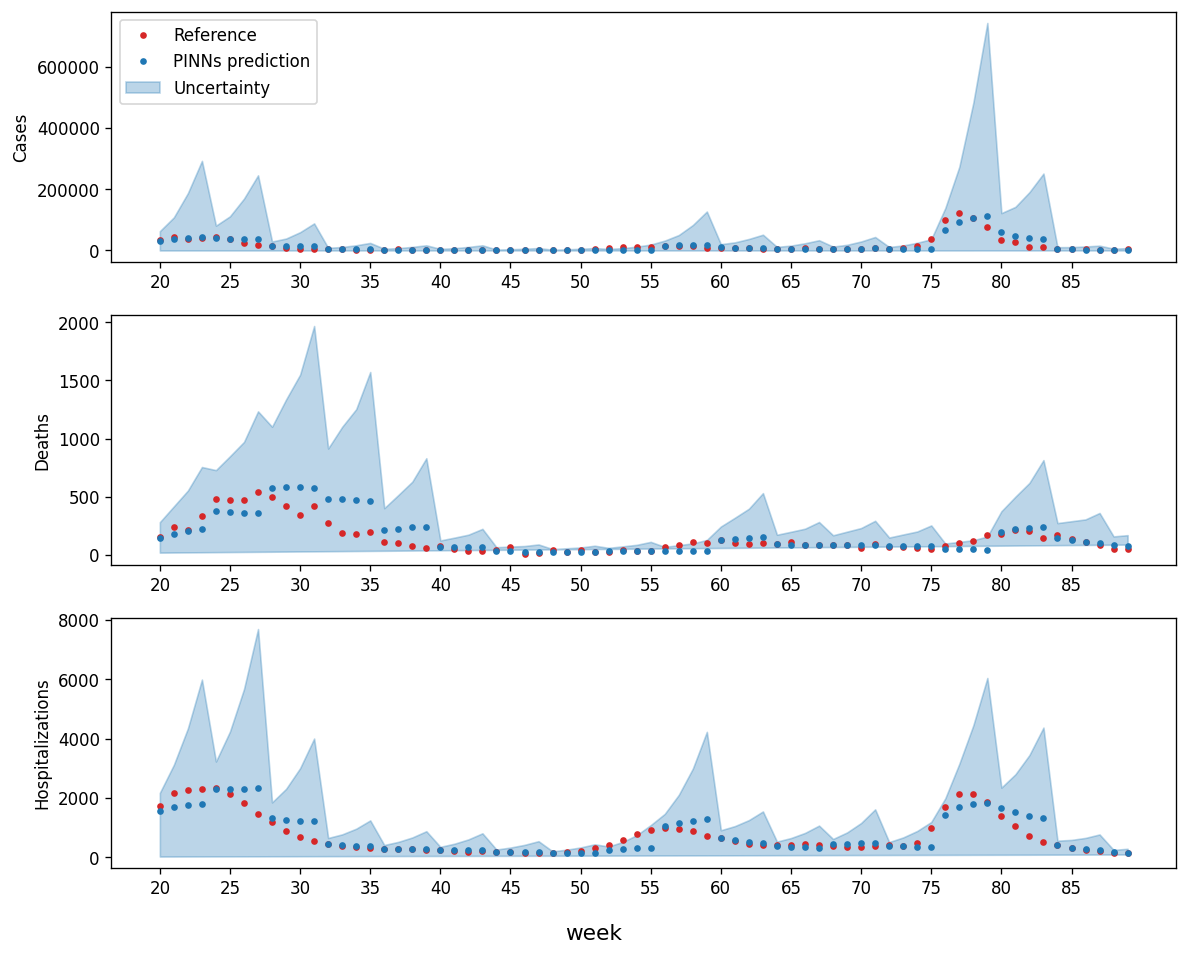

In [11]:
week_start = 20
week_end = 90
x_cases, y_cases, z_cases, x_deaths, y_deaths, z_deaths, x_hospitalized, y_hospitalized, z_hospitalized = \
    calConcatQuantileForecasts(week_start, week_end, cases_quantile_975, cases_quantile_025, deaths_quantile_975, deaths_quantile_025, hospitalized_quantile_975, hospitalized_quantile_025)


fig = plt.figure(figsize=(10, 8), dpi=120)

sub = plt.subplot(3, 1, 1)
plt.plot(np.arange(week_start, week_end), data_ref["cases"].T[20+week_start:20+week_end], '.', color="tab:red", label="Reference")
plt.plot(np.arange(week_start, week_end, 4), np.exp(cases_pred[0])[week_start-20:week_end-20][::4], '.', color="tab:blue", label="PINNs prediction")
plt.plot(np.arange(week_start+1, week_end, 4), np.exp(cases_pred[1])[week_start-20:week_end-20][1::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+2, week_end, 4), np.exp(cases_pred[2])[week_start-20:week_end-20][2::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+3, week_end, 4), np.exp(cases_pred[3])[week_start-20:week_end-20][3::4], '.', color="tab:blue")
# plt.fill_between(np.arange(week_start, week_end, 4), np.exp(cases_1w_quantile_025)[week_start-20:week_end-20][::4], np.exp(cases_1w_quantile_975)[week_start-20:week_end-20][::4], color="tab:blue", alpha=0.3, label="uncertainty")
plt.fill_between(np.arange(week_start, week_end), x_cases, y_cases, z_cases, color="tab:blue", alpha=0.3, label="Uncertainty")
plt.xticks(range(week_start, week_end, 5))
plt.ylabel("Cases")
plt.legend(loc="upper left")

sub = plt.subplot(3, 1, 2)
plt.plot(np.arange(week_start, week_end), data_ref["deaths"].T[20+week_start:20+week_end], '.', color="tab:red", label="Reference")
plt.plot(np.arange(week_start, week_end, 4), np.exp(deaths_pred[0])[week_start-20:week_end-20][::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+1, week_end, 4), np.exp(deaths_pred[1])[week_start-20:week_end-20][1::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+2, week_end, 4), np.exp(deaths_pred[2])[week_start-20:week_end-20][2::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+3, week_end, 4), np.exp(deaths_pred[3])[week_start-20:week_end-20][3::4], '.', color="tab:blue")
plt.fill_between(np.arange(week_start, week_end), x_deaths, y_deaths, z_deaths, color="tab:blue", alpha=0.3, label="uncertainty")
plt.xticks(range(week_start, week_end, 5))
plt.ylabel("Deaths")

sub = plt.subplot(3, 1, 3)
plt.plot(np.arange(week_start, week_end), data_ref["hospitalized"].T[20+week_start:20+week_end], '.', color="tab:red", label="Reference")
plt.plot(np.arange(week_start, week_end, 4), np.exp(hospitalized_pred[0])[week_start-20:week_end-20][::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+1, week_end, 4), np.exp(hospitalized_pred[1])[week_start-20:week_end-20][1::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+2, week_end, 4), np.exp(hospitalized_pred[2])[week_start-20:week_end-20][2::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+3, week_end, 4), np.exp(hospitalized_pred[3])[week_start-20:week_end-20][3::4], '.', color="tab:blue")
plt.fill_between(np.arange(week_start, week_end), x_hospitalized, y_hospitalized, z_hospitalized, color="tab:blue", alpha=0.3, label="uncertainty")
plt.xticks(range(week_start, week_end, 5))
plt.ylabel("Hospitalizations")

fig.supxlabel("week", fontsize=13)
plt.tight_layout()

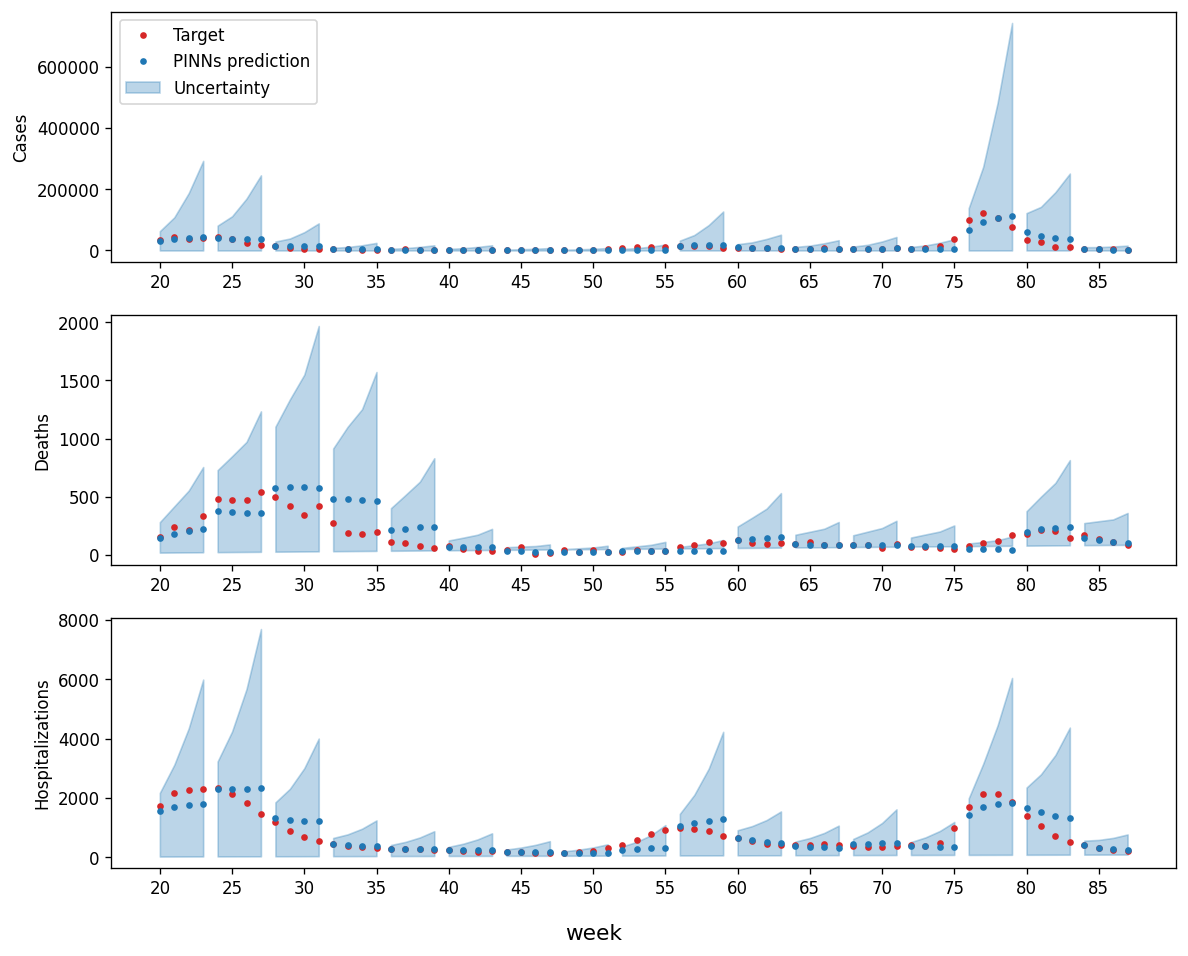

In [12]:
week_start = 20
week_end = 88
x_cases, y_cases, z_cases, x_deaths, y_deaths, z_deaths, x_hospitalized, y_hospitalized, z_hospitalized = \
    calConcatQuantileForecasts(week_start, week_end, cases_quantile_975, cases_quantile_025, deaths_quantile_975, deaths_quantile_025, hospitalized_quantile_975, hospitalized_quantile_025)


fig = plt.figure(figsize=(10, 8), dpi=120)

sub = plt.subplot(3, 1, 1)
plt.plot(np.arange(week_start, week_end), data_ref["cases"].T[20+week_start:20+week_end], '.', color="tab:red", label="Target")
plt.plot(np.arange(week_start, week_end, 4), np.exp(cases_pred[0])[week_start-20:week_end-20][::4], '.', color="tab:blue", label="PINNs prediction")
plt.plot(np.arange(week_start+1, week_end, 4), np.exp(cases_pred[1])[week_start-20:week_end-20][1::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+2, week_end, 4), np.exp(cases_pred[2])[week_start-20:week_end-20][2::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+3, week_end, 4), np.exp(cases_pred[3])[week_start-20:week_end-20][3::4], '.', color="tab:blue")
# plt.fill_between(np.arange(week_start, week_end, 4), np.exp(cases_1w_quantile_025)[week_start-20:week_end-20][::4], np.exp(cases_1w_quantile_975)[week_start-20:week_end-20][::4], color="tab:blue", alpha=0.3, label="uncertainty")
# plt.fill_between(np.arange(week_start, week_end), x_cases, y_cases, z_cases, color="tab:blue", alpha=0.3, label="Uncertainty")
i = week_start
while (i + 4 <= week_end):
    i0 = i - 20
    if (i == week_start):
        plt.fill_between(np.arange(i, i + 4), x_cases[i0:i0+4], y_cases[i0:i0+4], z_cases[i0:i0+4], color="tab:blue", alpha=0.3, label="Uncertainty")
    else: 
        plt.fill_between(np.arange(i, i + 4), x_cases[i0:i0+4], y_cases[i0:i0+4], z_cases[i0:i0+4], color="tab:blue", alpha=0.3)
    i += 4
plt.xticks(range(week_start, week_end, 5))
plt.ylabel("Cases")
plt.legend(loc="upper left")

sub = plt.subplot(3, 1, 2)
plt.plot(np.arange(week_start, week_end), data_ref["deaths"].T[20+week_start:20+week_end], '.', color="tab:red", label="Reference")
plt.plot(np.arange(week_start, week_end, 4), np.exp(deaths_pred[0])[week_start-20:week_end-20][::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+1, week_end, 4), np.exp(deaths_pred[1])[week_start-20:week_end-20][1::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+2, week_end, 4), np.exp(deaths_pred[2])[week_start-20:week_end-20][2::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+3, week_end, 4), np.exp(deaths_pred[3])[week_start-20:week_end-20][3::4], '.', color="tab:blue")
# plt.fill_between(np.arange(week_start, week_end), x_deaths, y_deaths, z_deaths, color="tab:blue", alpha=0.3, label="uncertainty")
i = week_start
while (i + 4 <= week_end):
    i0 = i - 20
    if (i == week_start):
        plt.fill_between(np.arange(i, i + 4), x_deaths[i0:i0+4], y_deaths[i0:i0+4], z_deaths[i0:i0+4], color="tab:blue", alpha=0.3, label="Uncertainty")
    else: 
        plt.fill_between(np.arange(i, i + 4), x_deaths[i0:i0+4], y_deaths[i0:i0+4], z_deaths[i0:i0+4], color="tab:blue", alpha=0.3)
    i += 4
plt.xticks(range(week_start, week_end, 5))
plt.ylabel("Deaths")

sub = plt.subplot(3, 1, 3)
plt.plot(np.arange(week_start, week_end), data_ref["hospitalized"].T[20+week_start:20+week_end], '.', color="tab:red", label="Reference")
plt.plot(np.arange(week_start, week_end, 4), np.exp(hospitalized_pred[0])[week_start-20:week_end-20][::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+1, week_end, 4), np.exp(hospitalized_pred[1])[week_start-20:week_end-20][1::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+2, week_end, 4), np.exp(hospitalized_pred[2])[week_start-20:week_end-20][2::4], '.', color="tab:blue")
plt.plot(np.arange(week_start+3, week_end, 4), np.exp(hospitalized_pred[3])[week_start-20:week_end-20][3::4], '.', color="tab:blue")
# plt.fill_between(np.arange(week_start, week_end), x_hospitalized, y_hospitalized, z_hospitalized, color="tab:blue", alpha=0.3, label="uncertainty")
i = week_start
while (i + 4 <= week_end):
    i0 = i - 20
    if (i == week_start):
        plt.fill_between(np.arange(i, i + 4), x_hospitalized[i0:i0+4], y_hospitalized[i0:i0+4], z_hospitalized[i0:i0+4], color="tab:blue", alpha=0.3, label="Uncertainty")
    else: 
        plt.fill_between(np.arange(i, i + 4), x_hospitalized[i0:i0+4], y_hospitalized[i0:i0+4], z_hospitalized[i0:i0+4], color="tab:blue", alpha=0.3)
    i += 4
plt.xticks(range(week_start, week_end, 5))
plt.ylabel("Hospitalizations")

fig.supxlabel("week", fontsize=13)
plt.tight_layout()

In [13]:
# cases_1w = np.exp(cases_pred[0])[week_start-20:week_end-20][::4]
# cases_2w = np.exp(cases_pred[1])[week_start-20:week_end-20][1::4]
# cases_3w = np.exp(cases_pred[2])[week_start-20:week_end-20][2::4]
# cases_4w = np.exp(cases_pred[3])[week_start-20:week_end-20][3::4]

# deaths_1w = np.exp(deaths_pred[0])[week_start-20:week_end-20][::4]
# deaths_2w = np.exp(deaths_pred[1])[week_start-20:week_end-20][1::4]
# deaths_3w = np.exp(deaths_pred[2])[week_start-20:week_end-20][2::4]
# deaths_4w = np.exp(deaths_pred[3])[week_start-20:week_end-20][3::4]

# hosp_1w = np.exp(hospitalized_pred[0])[week_start-20:week_end-20][::4]
# hosp_2w = np.exp(hospitalized_pred[1])[week_start-20:week_end-20][1::4]
# hosp_3w = np.exp(hospitalized_pred[2])[week_start-20:week_end-20][2::4]
# hosp_4w = np.exp(hospitalized_pred[3])[week_start-20:week_end-20][3::4]

In [14]:
# plt.plot(np.arange(20, 88, 4), cases_1w, '.', color="tab:blue")
# plt.plot(np.arange(21, 88, 4), cases_2w, '.', color="tab:blue")
# plt.plot(np.arange(22, 88, 4), cases_3w, '.', color="tab:blue")
# plt.plot(np.arange(23, 88, 4), cases_4w, '.', color="tab:blue")

In [15]:
# plt.plot(np.arange(20, 88, 4), deaths_1w, '.', color="tab:blue")
# plt.plot(np.arange(21, 88, 4), deaths_2w, '.', color="tab:blue")
# plt.plot(np.arange(22, 88, 4), deaths_3w, '.', color="tab:blue")
# plt.plot(np.arange(23, 88, 4), deaths_4w, '.', color="tab:blue")

In [16]:
# plt.plot(np.arange(20, 88, 4), hosp_1w, '.', color="tab:blue")
# plt.plot(np.arange(21, 88, 4), hosp_2w, '.', color="tab:blue")
# plt.plot(np.arange(22, 88, 4), hosp_3w, '.', color="tab:blue")
# plt.plot(np.arange(23, 88, 4), hosp_4w, '.', color="tab:blue")

In [17]:
# dic = {"cases_pred_1w": cases_1w,
#        "cases_pred_2w": cases_2w, 
#        "cases_pred_3w": cases_3w, 
#        "cases_pred_4w": cases_4w, 
#        "deaths_pred_1w": deaths_1w, 
#        "deaths_pred_2w": deaths_2w, 
#        "deaths_pred_3w": deaths_3w, 
#        "deaths_pred_4w": deaths_4w, 
#        "hospitalized_pred_1w": hosp_1w, 
#        "hospitalized_pred_2w": hosp_2w, 
#        "hospitalized_pred_3w": hosp_3w, 
#        "hospitalized_pred_4w": hosp_4w}

In [18]:
# sio.savemat("pinn_result_latest.mat", dic)

In [19]:
# dic

In [20]:
all_cases_pred = res['all_cases_pred']
all_deaths_pred = res['all_deaths_pred']
all_hospitalized_pred = res['all_hospitalized_pred']


cases_pred_1w = all_cases_pred[0][40:-4]
cases_pred_2w = all_cases_pred[1][40:-4]
cases_pred_3w = all_cases_pred[2][40:-4]
cases_pred_4w = all_cases_pred[3][40:-4]

deaths_pred_1w = all_deaths_pred[0][40:-4]
deaths_pred_2w = all_deaths_pred[1][40:-4]
deaths_pred_3w = all_deaths_pred[2][40:-4]
deaths_pred_4w = all_deaths_pred[3][40:-4]

hospitalized_pred_1w = all_hospitalized_pred[0][40:-4]
hospitalized_pred_2w = all_hospitalized_pred[1][40:-4]
hospitalized_pred_3w = all_hospitalized_pred[2][40:-4]
hospitalized_pred_4w = all_hospitalized_pred[3][40:-4]

Text(0.02, 0.5, 'predictions for the following weeks')

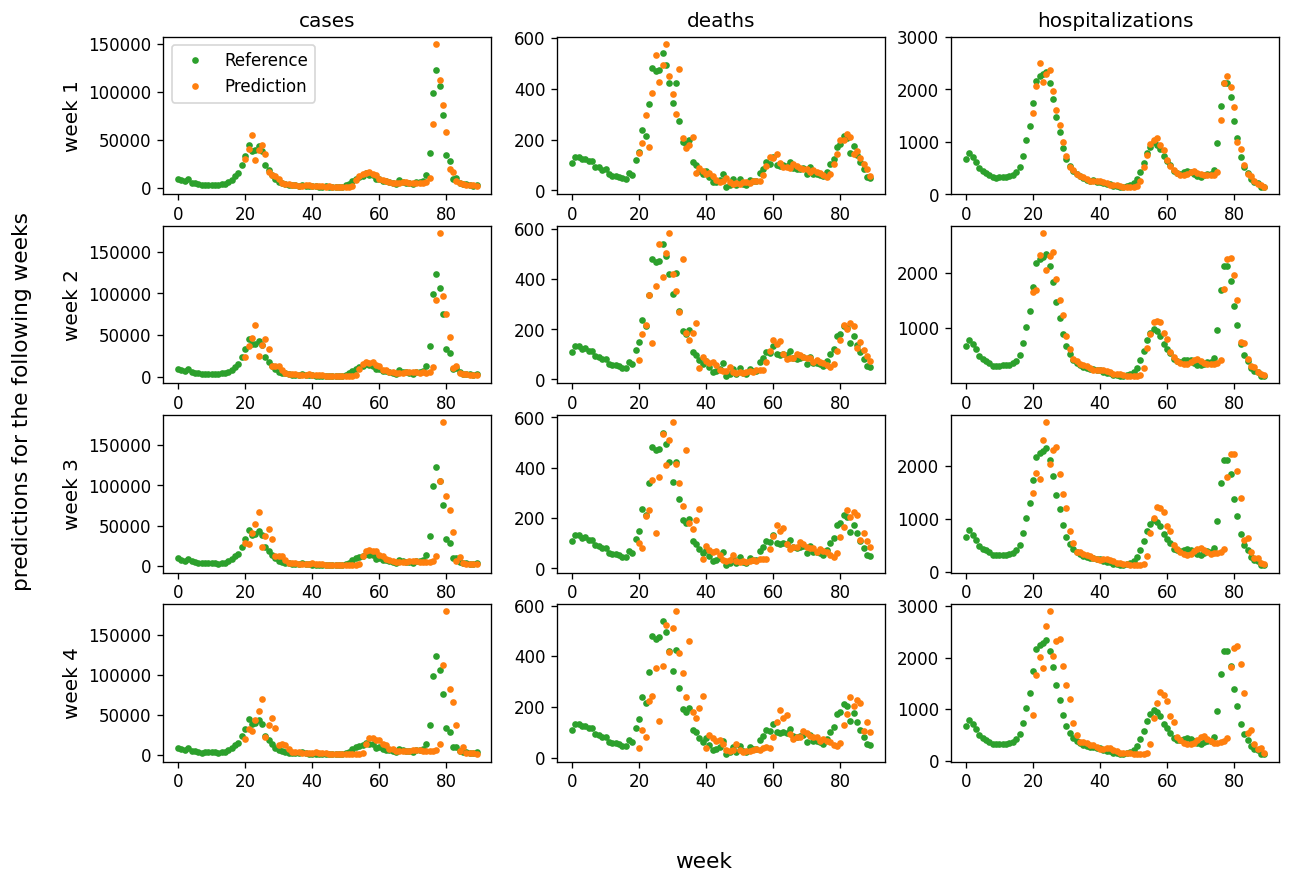

In [21]:
fig = plt.figure(figsize=(12, 8), dpi=120)
plt.subplot(4, 3, 1)
plt.plot(np.arange(0, 90), data_ref["cases"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), cases_pred_1w * 120000, '.', color='tab:orange', label="Prediction")
plt.ylabel("week 1", fontsize=12)
plt.title("cases", fontsize=12)
plt.legend()

plt.subplot(4, 3, 2)
plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), deaths_pred_1w * 500, '.', color="tab:orange")
plt.title("deaths", fontsize=12)

plt.subplot(4, 3, 3)
plt.plot(np.arange(0, 90), data_ref["hospitalized"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), hospitalized_pred_1w * 2000, '.', color='tab:orange')
plt.ylim((0, 3000))
plt.title("hospitalizations", fontsize=12)

plt.subplot(4, 3, 4)
plt.plot(np.arange(0, 90), data_ref["cases"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), cases_pred_2w * 120000, '.', color='tab:orange')
plt.ylabel("week 2", fontsize=12)

plt.subplot(4, 3, 5)
plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), deaths_pred_2w * 500, '.', color='tab:orange')

plt.subplot(4, 3, 6)
plt.plot(np.arange(0, 90), data_ref["hospitalized"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), hospitalized_pred_2w * 2000, '.', color='tab:orange')

plt.subplot(4, 3, 7)
plt.plot(np.arange(0, 90), data_ref["cases"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), cases_pred_3w * 120000, '.', color='tab:orange')
plt.ylabel("week 3", fontsize=12)

plt.subplot(4, 3, 8)
plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), deaths_pred_3w * 500, '.', color='tab:orange')

plt.subplot(4, 3, 9)
plt.plot(np.arange(0, 90), data_ref["hospitalized"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), hospitalized_pred_3w * 2000, '.', color='tab:orange')

plt.subplot(4, 3, 10)
plt.plot(np.arange(0, 90), data_ref["cases"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), cases_pred_4w * 120000, '.', color='tab:orange')
plt.ylabel("week 4", fontsize=12)

plt.subplot(4, 3, 11)
plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), deaths_pred_4w * 500, '.', color='tab:orange')

plt.subplot(4, 3, 12)
plt.plot(np.arange(0, 90), data_ref["hospitalized"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), hospitalized_pred_4w * 2000, '.', color='tab:orange')

fig.supxlabel("week", fontsize=13)
fig.supylabel("predictions for the following weeks", fontsize=13)

Text(0.02, 0.5, 'predictions for the following weeks')

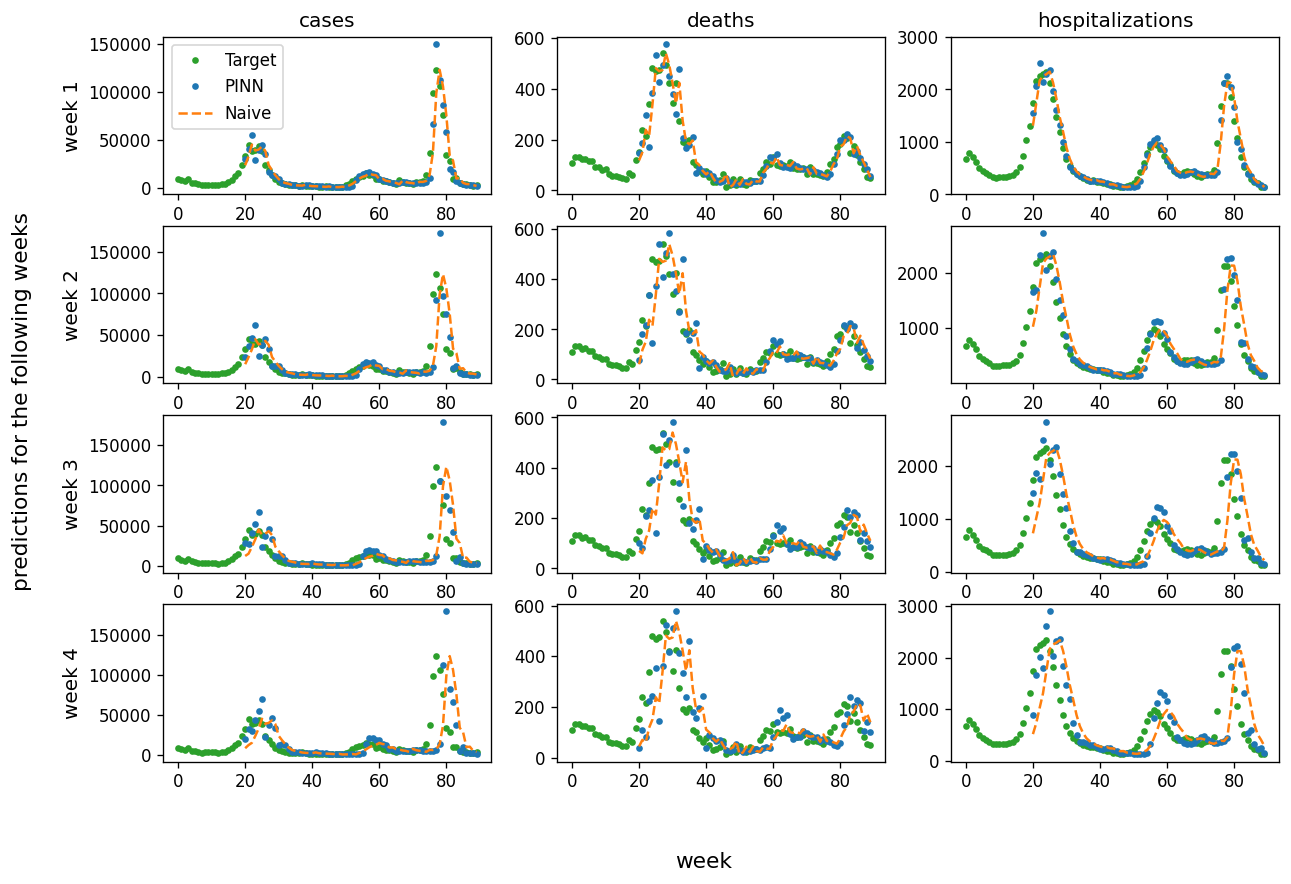

In [22]:
fig = plt.figure(figsize=(12, 8), dpi=120)
plt.subplot(4, 3, 1)
plt.plot(np.arange(0, 90), data_ref["cases"].T[20:110], '.', color="tab:green", label="Target")
plt.plot(np.arange(20, 90), cases_pred_1w * 120000, '.', color='tab:blue', label="PINN")
plt.plot(np.arange(20, 90), data_ref["cases"].T[40-1:110-1], '--', color="tab:orange", label="Naive")
plt.ylabel("week 1", fontsize=12)
plt.title("cases", fontsize=12)
plt.legend()

plt.subplot(4, 3, 2)
plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), deaths_pred_1w * 500, '.', color="tab:blue")
plt.plot(np.arange(20, 90), data_ref["deaths"].T[40-1:110-1], '--', color="tab:orange", label="Naive")
plt.title("deaths", fontsize=12)

plt.subplot(4, 3, 3)
plt.plot(np.arange(0, 90), data_ref["hospitalized"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), hospitalized_pred_1w * 2000, '.', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["hospitalized"].T[40-1:110-1], '--', color="tab:orange", label="Naive")
plt.ylim((0, 3000))
plt.title("hospitalizations", fontsize=12)

plt.subplot(4, 3, 4)
plt.plot(np.arange(0, 90), data_ref["cases"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), cases_pred_2w * 120000, '.', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["cases"].T[40-2:110-2], '--', color="tab:orange", label="Naive")
plt.ylabel("week 2", fontsize=12)

plt.subplot(4, 3, 5)
plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), deaths_pred_2w * 500, '.', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["deaths"].T[40-2:110-2], '--', color="tab:orange", label="Naive")

plt.subplot(4, 3, 6)
plt.plot(np.arange(0, 90), data_ref["hospitalized"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), hospitalized_pred_2w * 2000, '.', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["hospitalized"].T[40-2:110-2], '--', color="tab:orange", label="Naive")

plt.subplot(4, 3, 7)
plt.plot(np.arange(0, 90), data_ref["cases"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), cases_pred_3w * 120000, '.', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["cases"].T[40-3:110-3], '--', color="tab:orange", label="Naive")
plt.ylabel("week 3", fontsize=12)

plt.subplot(4, 3, 8)
plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), deaths_pred_3w * 500, '.', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["deaths"].T[40-3:110-3], '--', color="tab:orange", label="Naive")

plt.subplot(4, 3, 9)
plt.plot(np.arange(0, 90), data_ref["hospitalized"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), hospitalized_pred_3w * 2000, '.', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["hospitalized"].T[40-3:110-3], '--', color="tab:orange", label="Naive")

plt.subplot(4, 3, 10)
plt.plot(np.arange(0, 90), data_ref["cases"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), cases_pred_4w * 120000, '.', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["cases"].T[40-4:110-4], '--', color="tab:orange", label="Naive")
plt.ylabel("week 4", fontsize=12)

plt.subplot(4, 3, 11)
plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), deaths_pred_4w * 500, '.', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["deaths"].T[40-4:110-4], '--', color="tab:orange", label="Naive")

plt.subplot(4, 3, 12)
plt.plot(np.arange(0, 90), data_ref["hospitalized"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 90), hospitalized_pred_4w * 2000, '.', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["hospitalized"].T[40-4:110-4], '--', color="tab:orange", label="Naive")

fig.supxlabel("week", fontsize=13)
fig.supylabel("predictions for the following weeks", fontsize=13)

In [23]:
# dic = {"cases_pred_1w": cases_pred_1w * 120000,
#        "cases_pred_2w": cases_pred_2w * 120000, 
#        "cases_pred_3w": cases_pred_3w * 120000, 
#        "cases_pred_4w": cases_pred_4w * 120000, 
#        "deaths_pred_1w": deaths_pred_1w * 500, 
#        "deaths_pred_2w": deaths_pred_2w * 500, 
#        "deaths_pred_3w": deaths_pred_3w * 500, 
#        "deaths_pred_4w": deaths_pred_4w * 500, 
#        "hospitalized_pred_1w": hospitalized_pred_1w * 2000, 
#        "hospitalized_pred_2w": hospitalized_pred_2w * 2000, 
#        "hospitalized_pred_3w": hospitalized_pred_3w * 2000, 
#        "hospitalized_pred_4w": hospitalized_pred_4w * 2000}

In [24]:
# dic.keys()

In [25]:
# sio.savemat("pinn_res_all.mat", dic)

In [26]:
# fig = plt.figure(dpi=120)
# plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
# plt.plot(np.arange(20, 90), dic['deaths_pred_1w'], '-', color="tab:blue", label="PINN")
# plt.plot(np.arange(20, 90), data_ref["deaths"].T[40-1:110-1], '--', color="tab:orange", label="Naive")
# plt.title("1 week predictions for deaths", fontsize=12)
# plt.legend()

In [27]:
gisst_res = sio.loadmat("result/gisst_point_forecasts.mat")

Text(0.02, 0.5, 'predictions for the following weeks')

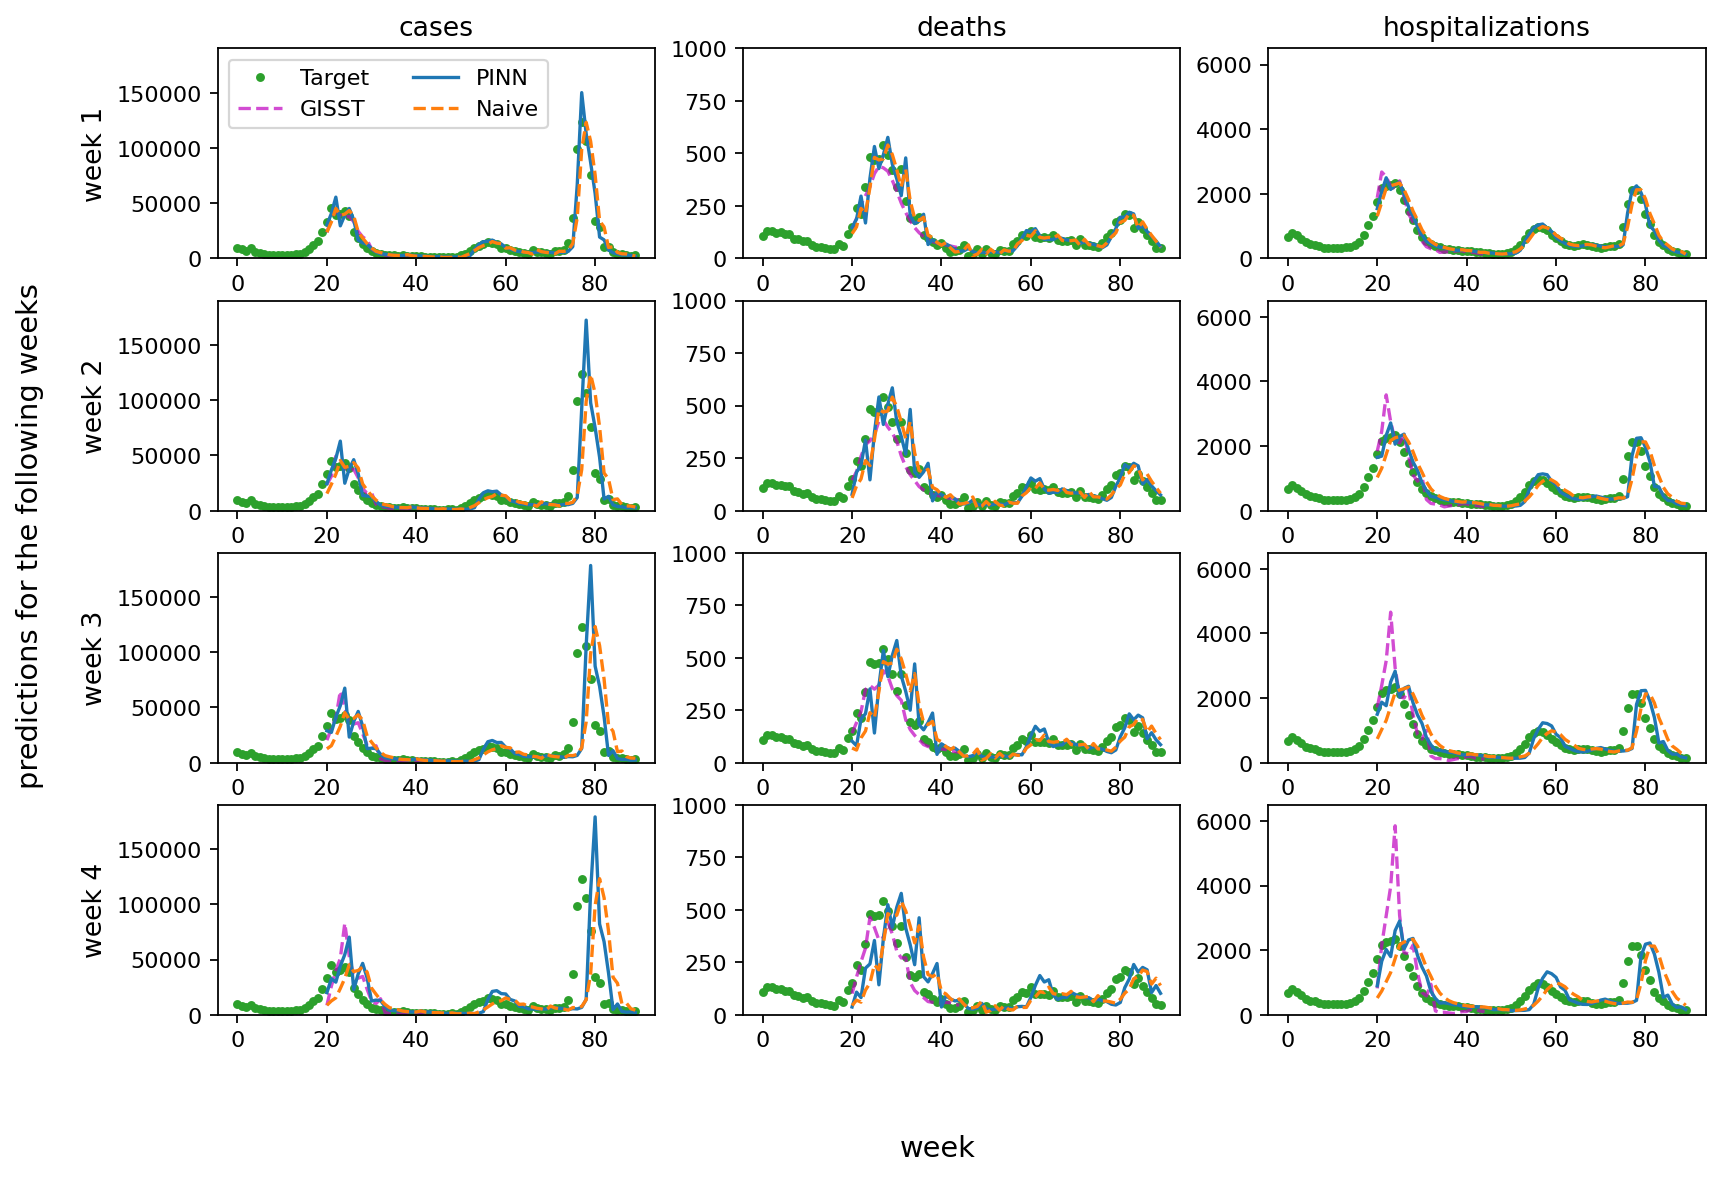

In [28]:
fig = plt.figure(figsize=(12, 8), dpi=160)
plt.subplot(4, 3, 1)
plt.plot(np.arange(0, 90), data_ref["cases"].T[20:110], '.', color="tab:green", label="Target")
plt.plot(gisst_res["week"][0], gisst_res["cases_pred_1w"][0], '--', color="m", label="GISST", alpha = 0.7)
plt.plot(np.arange(20, 90), cases_pred_1w * 120000, '-', color='tab:blue', label="PINN")
plt.plot(np.arange(20, 90), data_ref["cases"].T[40-1:110-1], '--', color="tab:orange", label="Naive")
plt.ylabel("week 1", fontsize=12)
plt.title("cases", fontsize=12)
plt.ylim(0, 190000)
plt.legend(ncol=2)

plt.subplot(4, 3, 2)
plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(gisst_res["week"][0], gisst_res["deaths_pred_1w"][0], '--', color="m", label="GISST", alpha = 0.7)
plt.plot(np.arange(20, 90), deaths_pred_1w * 500, '-', color="tab:blue")
plt.plot(np.arange(20, 90), data_ref["deaths"].T[40-1:110-1], '--', color="tab:orange", label="Naive")
plt.title("deaths", fontsize=12)
plt.ylim(0, 1000)

plt.subplot(4, 3, 3)
plt.plot(np.arange(0, 90), data_ref["hospitalized"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(gisst_res["week"][0], gisst_res["hospitalized_pred_1w"][0], '--', color="m", label="GISST", alpha = 0.7)
plt.plot(np.arange(20, 90), hospitalized_pred_1w * 2000, '-', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["hospitalized"].T[40-1:110-1], '--', color="tab:orange", label="Naive")
plt.ylim(0, 6500)
plt.title("hospitalizations", fontsize=12)

plt.subplot(4, 3, 4)
plt.plot(np.arange(0, 90), data_ref["cases"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(gisst_res["week"][0], gisst_res["cases_pred_2w"][0], '--', color="m", label="GISST", alpha = 0.7)
plt.plot(np.arange(20, 90), cases_pred_2w * 120000, '-', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["cases"].T[40-2:110-2], '--', color="tab:orange", label="Naive")
plt.ylabel("week 2", fontsize=12)
plt.ylim(0, 190000)

plt.subplot(4, 3, 5)
plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(gisst_res["week"][0], gisst_res["deaths_pred_2w"][0], '--', color="m", label="GISST", alpha = 0.7)
plt.plot(np.arange(20, 90), deaths_pred_2w * 500, '-', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["deaths"].T[40-2:110-2], '--', color="tab:orange", label="Naive")
plt.ylim(0, 1000)

plt.subplot(4, 3, 6)
plt.plot(np.arange(0, 90), data_ref["hospitalized"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(gisst_res["week"][0], gisst_res["hospitalized_pred_2w"][0], '--', color="m", label="GISST", alpha = 0.7)
plt.plot(np.arange(20, 90), hospitalized_pred_2w * 2000, '-', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["hospitalized"].T[40-2:110-2], '--', color="tab:orange", label="Naive")
plt.ylim(0, 6500)

plt.subplot(4, 3, 7)
plt.plot(np.arange(0, 90), data_ref["cases"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(gisst_res["week"][0], gisst_res["cases_pred_3w"][0], '--', color="m", label="GISST", alpha = 0.7)
plt.plot(np.arange(20, 90), cases_pred_3w * 120000, '-', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["cases"].T[40-3:110-3], '--', color="tab:orange", label="Naive")
plt.ylabel("week 3", fontsize=12)
plt.ylim(0, 190000)

plt.subplot(4, 3, 8)
plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(gisst_res["week"][0], gisst_res["deaths_pred_3w"][0], '--', color="m", label="GISST", alpha = 0.7)
plt.plot(np.arange(20, 90), deaths_pred_3w * 500, '-', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["deaths"].T[40-3:110-3], '--', color="tab:orange", label="Naive")
plt.ylim(0, 1000)

plt.subplot(4, 3, 9)
plt.plot(np.arange(0, 90), data_ref["hospitalized"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(gisst_res["week"][0], gisst_res["hospitalized_pred_3w"][0], '--', color="m", label="GISST", alpha = 0.7)
plt.plot(np.arange(20, 90), hospitalized_pred_3w * 2000, '-', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["hospitalized"].T[40-3:110-3], '--', color="tab:orange", label="Naive")
plt.ylim(0, 6500)

plt.subplot(4, 3, 10)
plt.plot(np.arange(0, 90), data_ref["cases"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(gisst_res["week"][0], gisst_res["cases_pred_4w"][0], '--', color="m", label="GISST", alpha = 0.7)
plt.plot(np.arange(20, 90), cases_pred_4w * 120000, '-', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["cases"].T[40-4:110-4], '--', color="tab:orange", label="Naive")
plt.ylabel("week 4", fontsize=12)
plt.ylim(0, 190000)

plt.subplot(4, 3, 11)
plt.plot(np.arange(0, 90), data_ref["deaths"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(gisst_res["week"][0], gisst_res["deaths_pred_4w"][0], '--', color="m", label="GISST", alpha = 0.7)
plt.plot(np.arange(20, 90), deaths_pred_4w * 500, '-', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["deaths"].T[40-4:110-4], '--', color="tab:orange", label="Naive")
plt.ylim(0, 1000)

plt.subplot(4, 3, 12)
plt.plot(np.arange(0, 90), data_ref["hospitalized"].T[20:110], '.', color="tab:green", label="Reference")
plt.plot(gisst_res["week"][0], gisst_res["hospitalized_pred_4w"][0], '--', color="m", label="GISST", alpha = 0.7)
plt.plot(np.arange(20, 90), hospitalized_pred_4w * 2000, '-', color='tab:blue')
plt.plot(np.arange(20, 90), data_ref["hospitalized"].T[40-4:110-4], '--', color="tab:orange", label="Naive")
plt.ylim(0, 6500)

fig.supxlabel("week", fontsize=13)
fig.supylabel("predictions for the following weeks", fontsize=13)

In [29]:
gisst_res["cases_pred_4w"][0]

array([ 8506.14285714, 25904.57142857, 39904.71428571, 51064.85714286,
       82718.71428571, 53080.28571429, 34131.71428571, 33143.42857143,
       34651.71428571, 23130.71428571, 12411.42857143, 10134.57142857,
       14531.28571429,  2050.28571429,  1209.14285714,  1233.14285714,
         717.57142857,   486.12857143,   723.14285714,  1052.28571429,
         929.28571429,  1725.        ,  1699.57142857,  1164.42857143,
         819.42857143])

In [30]:
cases = [0.75, 0.78, 0.85, 0.89, 
         0.75, 0.77, 0.86, 0.89, 
         0.72, 0.76, 0.83, 0.88, 
         0.78, 0.81, 0.88, 0.9, 
#          0.75, 0.79, 0.87, 0.90, 
         0.73, 0.78, 0.85, 0.87, 
        0.70, 0.74, 0.81, 0.85]
deaths = [1.08, 1.05, 1.13, 1.25, 
          1.03, 1.05, 1.07, 1.17, 
          1.02, 1.02, 1.03, 1.1, 
          0.99, 0.97, 0.98, 1.05, 
#           0.99, 0.97, 1.01, 1.08, 
          1.01, 0.97, 0.97, 1.01, 
          1.00, 0.96, 0.95, 0.99]
hospitalized = [0.58, 0.7, 0.77, 0.82, 
                0.63, 0.71, 0.79, 0.81, 
                0.58, 0.67, 0.72, 0.76, 
                0.59, 0.67, 0.73, 0.77, 
#                 0.61, 0.68, 0.74, 0.78, 
                0.6, 0.65, 0.71, 0.78, 
                0.58, 0.63, 0.69, 0.77]

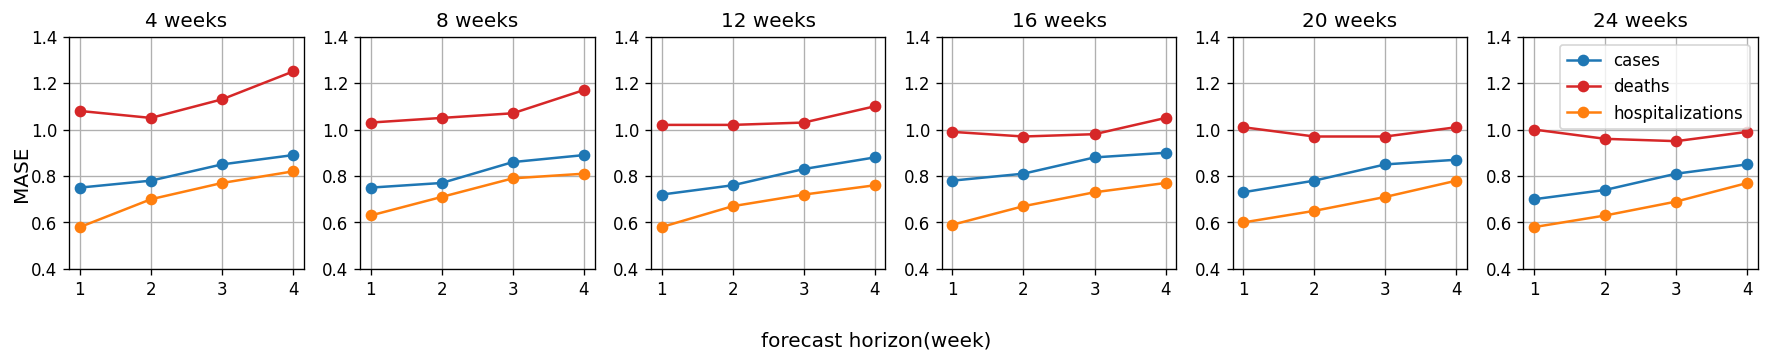

In [31]:
fig = plt.figure(figsize=(15, 3), dpi=120)
training_len = [4, 8, 12, 16, 20, 24]

for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.plot([1, 2, 3, 4], cases[i * 4: i * 4 + 4], 'o-', color='tab:blue', label="cases")
    plt.plot([1, 2, 3, 4], deaths[i * 4: i * 4 + 4], 'o-', color='tab:red', label="deaths")
    plt.plot([1, 2, 3, 4], hospitalized[i * 4: i * 4 + 4], 'o-', color='tab:orange', label="hospitalizations")
    plt.ylim([0.4, 1.4])
    plt.title(str(training_len[i]) + " weeks")
    if i == 5:
        plt.legend()
    plt.grid()

fig.supxlabel("forecast horizon(week)")
fig.supylabel("MASE")
fig.tight_layout()